## Deviation from NaturalFlow (DvNF) : Example

  **Definition:**
  Measures the degree to which current flow conditions have shifted from historic natural flows. The greater the deviation from natural flow indicates a higher risk of damage to the freshwater ecosystem (Poff and Zimmerman 2010). This measure can be derived from a wide range of variables, including deviation in annual mean, minimum and maximum discharge in the basin, proportion of the year that annual mean discharge was exceeded, etc.

  **Range of Output:**  
   100 indicates near natural conditions, 0 indicates high deviation; 100-80: Indicates that the seasonal pattern and magnitude of flow/levels resemble a natural flow regime; 80-50: Regulated flow which is likely to maintain seasonal pattern however, magnitudes (especially at peak and ebb points) show marked deviation from natural flow regime; Below 50: Indicates significant deviation in both seasonal pattern and magnitudes from natural flow regime.

   **Reference:**
   Ladson et al (1999), Gehrke et al. (1995), Gippel et al (2011)

In [ ]:
# Load libaries in Python to carry out calculation

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()

**DATA**
*Type/Class of Input required:*
Monthly flow data under present day and natural conditions for the same period 

*Suggested source of ‘minimum’ data to enable calculation:* 
Modeled monthly flow data for 5 years with/without all modifications to basin



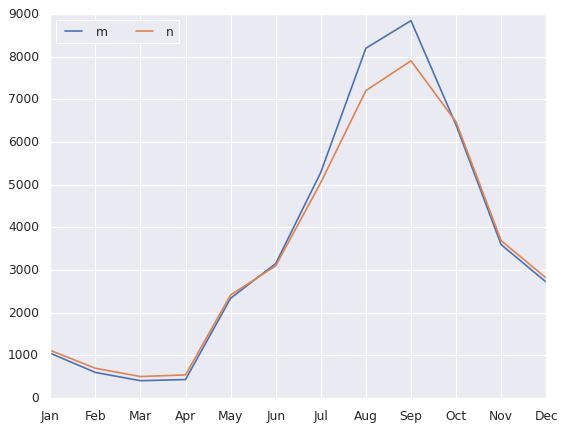

In [ ]:
# Two monthly time series with 12 data point for discharge with and without modification to flow

m=np.array([1047.39,597.11,402.94,429.53,2335.32,3146.97,5286.03,8195.13,8841.20,6394.61,3592.77,2712.10])
n=np.array([1114.48,694.18,500.87,538.37,2410.97,3095.70,5047.03,7201.19,7900.13,6467.77,3686.00,2808.13])

mnth=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(mnth,m)
plt.plot(mnth,n)
plt.legend('mn', ncol=2, loc='upper left');

**CALCULATION METHOD**
*Amended Annual Proportion of Flow Deviation (Gehrke et al. 1995,
    Gippel et al 2011):*

$$
AAPFD = \ \sum_{j = 1}^{p}\frac{\sqrt[2]{\sum_{i = 1}^{12}\left\lbrack \frac{m_{i} - n_{i}}{\bar{n_{i}}} \right\rbrack^{2}}}{p}
$$

>   Where, *mi* is monthly flow data accruing to current condition, *ni* is
>   modeled natural flow for the same period. *p* is the number of years and
>   $$\bar{n_{i}}$$ is mean reference flow for month *i* across
>   *p* years (Note: in ephemeral streams, this should be changed to incorporate
>   annual average flow to avoid extremely large values).

In [ ]:
a=(m-n)/n
a=a*a
ap=a.sum()
ap=np.sqrt(ap)

**RESULTS** <br>
Values are normalized
as follows using thresholds reported in Gehrke et al. 1995 and Gippel et al
2011:





In [ ]:
def DvNF(AAPFD):                
    if 0.0 <= AAPFD and AAPFD < 0.3:
        return 100 - 100 * AAPFD
    elif   0.3 <= AAPFD and AAPFD < 0.5:
        return 85 - 50 * AAPFD
    elif   0.5 <= AAPFD and AAPFD < 2.0: 
        return 80 - 20 * AAPFD
    elif   2.0 <= AAPFD and AAPFD < 5.0: 
        return 50 - 10 * AAPFD
    else:
        return 0
d=DvNF(ap)
print("DvNF score:",d)

DvNF score: 66.22799001634343


# DvNF: Full Implimentation


**DATA**<br>
Use the template provided [here](https://github.com/freshwaterhealth/fhiScripts/blob/main/01SampleDatasets/02_Ecosystem%20Vitality/DvNF%20Mock%20Data.xlsx) to prepare discharge data in excel spreadsheet.


1.   Each tab in the spreadsheet is named after the discharge gauge or location
2.   The first column in each tab is a date of linked to discharge. If mutliple readings are availble per month, the code will automatically take the mean for the month.

Run the code snippet below and upload your file.



In [ ]:
# Load libaries in Python to carry out calculation

import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()

from google.colab import files
uploaded = files.upload()

Saving DvNF Mock Data.xlsx to DvNF Mock Data.xlsx


**EDIT** the name of the file in square bracket in the code below to match the name of the file uploaded.<br>
**Then RUN** the code snippet. If data is uploaded correctly, plots of the discharge data for each gauge should appear below the code snippet.

Total number of gauges: 4


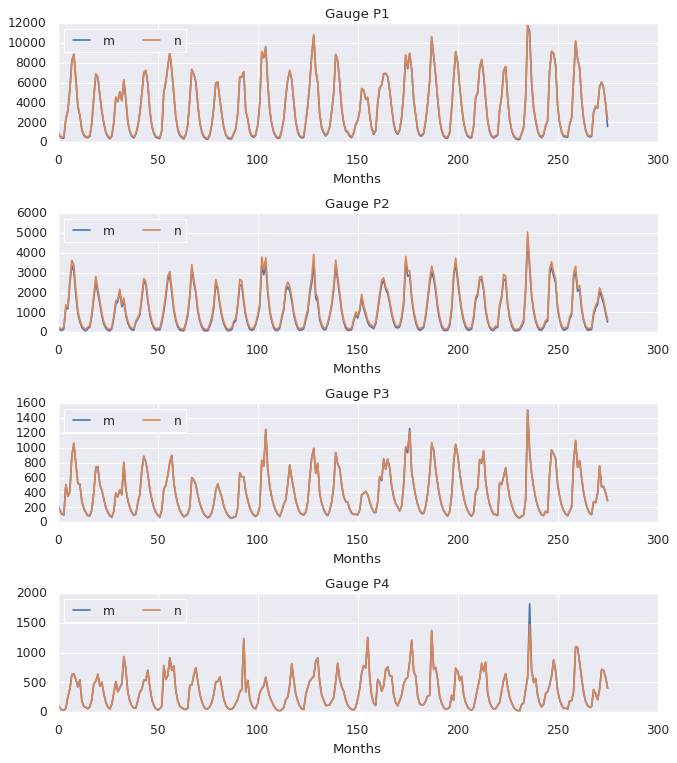

DvNF values for each gauge: [71.80662805 64.72255664 88.67525556 90.54105389]


In [ ]:
#Change filename in square brackets if needed:
df = pd.read_excel(io.BytesIO(uploaded['DvNF Mock Data.xlsx']), sheet_name = None, index_col=0)

def DvNF(AAPFD):                
    if 0.0 <= AAPFD and AAPFD < 0.3:
        return 100 - 100 * AAPFD
    elif   0.3 <= AAPFD and AAPFD < 0.5:
        return 85 - 50 * AAPFD
    elif   0.5 <= AAPFD and AAPFD < 2.0: 
        return 80 - 20 * AAPFD
    elif   2.0 <= AAPFD and AAPFD < 5.0: 
        return 50 - 10 * AAPFD
    else:
        return 0

n_gauge=list(df)
print("Total number of gauges:",len(n_gauge))
dvnfList=np.empty(len(n_gauge), dtype=float)
dischargeList=np.empty(len(n_gauge), dtype=float)
fig, ax = plt.subplots(len(n_gauge), 1, figsize=(9, 10))
fig.tight_layout(pad=3.0)

gauge_number=0

for i in n_gauge:

  df[i].index = pd.to_datetime(df[i].index)
  df_m=pd.DataFrame(df[i].resample('M').mean())
  df_m['month']=df_m.index.month
  monthly_mean=df_m.groupby('month').mean()

  m=df_m.iloc[:,0:1].values
  n=df_m.iloc[:,1:2].values
  
  ax[gauge_number].plot(m)
  ax[gauge_number].plot(n)
  ax[gauge_number].legend('mn', ncol=2, loc='upper left');
  ax[gauge_number].set_title("Gauge "+ i) 
  ax[gauge_number].set_xlabel('Months')
  dischargeList[gauge_number]=n.mean()

  sp=df_m.shape
  sp1=sp[0]/12
  n_1=monthly_mean.iloc[:,1:2].values
  n_m=n_1

  j=1
  while j<sp1:
    n_m=np.concatenate((n_m,n_1))
    j=j+1

  a=(m-n)/n_m
  a=a*a

  ap=pd.DataFrame(a)
  ap.index=df_m.index
  ap['year']=ap.index.year
  ap1=ap.groupby('year').sum()
  ap2=ap1.iloc[:,0:1].values
  ap2=np.sqrt(ap2)
  ap3=ap2.mean()

  d=DvNF(ap3)
  dvnfList[gauge_number]=d
  gauge_number=gauge_number+1

plt.show()
print("DvNF values for each gauge:", dvnfList)


**AGGREGATE** <BR>

With multiple gauages are used, user will have to derive a mean to get net DvNF indicator for the basin. Below, mean is derived with and without weighting with mean discharge of the gauge.

In [ ]:
print("Mean DvNF",dvnfList.mean())

wDVNF=dvnfList*dischargeList
wDVNF=wDVNF.mean()/dischargeList.mean()
print("Weighted DvNF",wDVNF)

Mean DvNF 78.93637353533899
Weighted DvNF 72.64689123543128
